<a href="https://colab.research.google.com/github/kig2929kig/Temperature/blob/main/%EA%B8%B0%EC%98%A8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 수집하기
+ 기온 데이터 : https://data.kma.go.kr
+ [기후통계분석]-[기온분석]-지역 및 기간 설정
+ CSV : Comma Separated Values


In [97]:
!rm -rf ./Temperature
!git clone https://github.com/kig2929kig/Temperature/

Cloning into 'Temperature'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


# 2. 데이터 살펴보기
+ 데이터의 전체적인 느낌 살펴보기
+ 데이터의 구조 및 통계적 특성 살펴보기
+ 빈 데이터 등 전처리하기

In [157]:
import pandas as pd

df = pd.read_csv('/content/Temperature/Temperature_Analysis.csv', encoding='cp949', skiprows = 7)
df = df.iloc[:, [0,2]]
df

,년,평균기온(℃)
0,1973,12.3
1,1974,11.3
2,1975,12.5
3,1976,11.5
4,1977,12.2
5,1978,12.7
6,1979,12.5
7,1980,11.1
8,1981,11.3
9,1982,12.3


In [105]:
# 데이터 전체 구조 알아보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   년        50 non-null     int64  
 1   평균기온(℃)  49 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [106]:
# 데이터 통계적 특성 알아보기
df.describe()

,년,평균기온(℃)
count,50.00000,49.000000
mean,1997.50000,12.365306
std,14.57738,0.560710
min,1973.00000,11.100000
25%,1985.25000,12.100000
50%,1997.50000,12.400000
75%,2009.75000,12.800000
max,2022.00000,13.400000


In [189]:
#연도, 평균기온 데이터 저장하기
year = df['년'].values
temperature = df['평균기온(℃)'].values

In [123]:
#temperature = temperature[:-50]
#year = year[:-50]
#temperature.shape
#year.shape
#type(year) # year의 데이터 타입은 numpy의 array입니다.
#df['날짜']
#df['평균기온(℃)']

(50, 1)

# 3. 데이터 속성 탐색하기
+ 어떤 속성이 문제해결에 도움이 될까?
+ 속성을 표현하기 적합한 방법은 무엇일까?

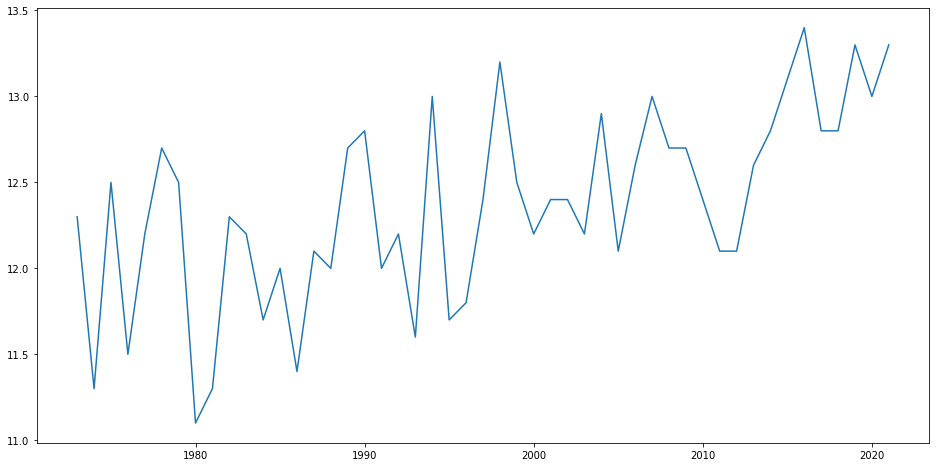

In [110]:
# 평균 기온을 꺽은선 그래프로 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(year, temperature)
plt.show()

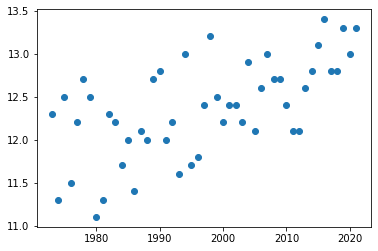

In [111]:
#연도와 평균 기온의 상관 관계를 보기 위해 산점도(scatter) 그리기
plt.scatter(year, temperature)
plt.show()

# 3. 선형 회귀 모델로 기온 예측해보기
[질문] 연도와 평균 기온의 관계를 가장 단순하게 표현한다면 어떤 모양이 적절할까?

In [181]:
# 학습에 필요한 형태로 데이터 모양 가공하기
# numpy : numeric python, 선형대수학 등에 활용

import numpy as np

#행열(매트릭)로 변경
year = np.reshape(df['년'].values, (-1,1)) #(-1, 1) : x행 1열 형태로 모양 바꾸기
temperature = np.reshape(df['평균기온(℃)'].values, (-1,1)) # (-1,1) x행 1열 형태로 모양 바꾸기

temperature[-1] = temperature[-2] # 2022년 온도 Nan => 2021년도 온도로 비워있는 값을 설정
#year[-20:]


In [182]:
#sklearn : scikit-learn, 파이썬 머신러닝 주요 라이브러리

from sklearn.linear_model import LinearRegression

#선행 회귀 모델 학습(fit)
model = LinearRegression().fit(year, temperature) # year와 temperature에 대한 가장 적절한 선형 관계(직선) 찾기

In [183]:
# 직선의 기울기와 절편 확인
a = model.coef_
b = model.intercept_
a, b

#y = ax + b (기울기 : 0.025) (절편 : -37.5)

(array([[0.0250084]]), array([-37.57028571]))

In [184]:
# 2050년의 평균 기온 결과 예측
model.predict([[2050]])

array([[13.69694118]])

# 4. 최근 데이터로 학습하면 결과가 어떻게 바뀔까?!


In [185]:
# 최근 20년간 데이터로 학습하기
model = LinearRegression().fit(year[-20:], temperature[-20:]) # year와 temperature에 대한 가장 적절한 선형 관계(직선) 찾기


In [186]:
a2 = model.coef_
b2 = model.intercept_
a2, b2

(array([[0.04511278]]), array([-78.02947368]))

In [187]:
model.predict([[2050]])

array([[14.45172932]])

# 5. 기온 예측 결과 시각화하기


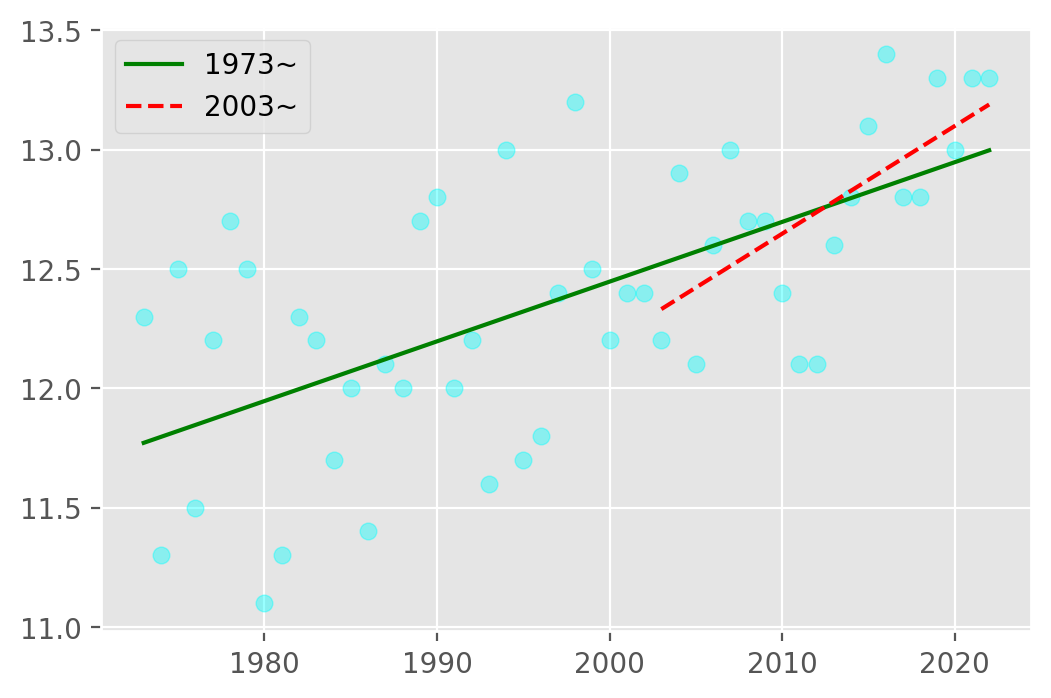

In [188]:
#원본 데이터와 선형 회귀로 예측한 2개의 모델을 각각 시각화하기
import matplotlib.pyplot as plt
# 그래프 해상도 설정 - dpi : dots per inch
plt.figure(dpi = 200)
# 그래프 스타일 적용
plt.style.use('ggplot')
#원본 데이터 : 산점도
plt.scatter(year, temperature, alpha = 0.4, color = 'cyan') # scatter(x, y, alpha : 색상의 투명도, 색)

#전체 데이터 학습 모델 :  초록색 직선
plt.plot(year, a * year + b, 'g', label='1973~')

#최근 20년 데이터 학습 모델 : 빨간색 점선
plt.plot(year[-20:], a2*year[-20:]+b2, 'r--', label = '2003~')

#범례 표시
plt.legend()
plt.show()